

#	Logistic Regression



 توجه توضیح یسری از سلول ها اگر وجود نداره در فایل
music.ipynb
 هست


 Note: Some of the explanations or cells may be missing here, but they are available in the file `music.ipynb`.


In [1]:
from math import log1p

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



دیتا از:
https://www.kaggle.com/code/desalegngeb/heart-disease-predictions/input ~~~Data


خوانش فایل

Reading file

In [2]:
file=pd.read_csv('heart.csv')
file

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0



هیستوگرامشو نشونم بده

show me histogram

 نکته: اگر شکل هیستوگرام یک ستون شبیه زنگوله باشه,احتمالا داده های اون ستون دارای توزیع نرمال هستن که نشون دهنده داده بهتر برای یادگیری موثر هست.

**Note:** If the histogram of a column resembles a bell shape, the data in that column is likely normally distributed—this often indicates better data for more effective learning.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

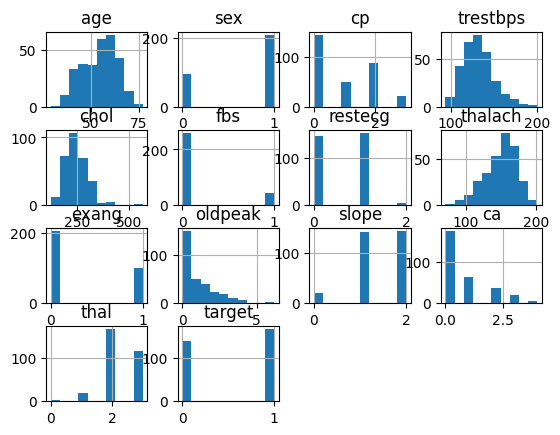

In [3]:
file.hist()

In [4]:
x=file[['ca','age','trestbps','chol','fbs','restecg','thal','thalach','oldpeak','slope','exang']]



نمایش میزان  چولگی ستون ها

Displaying the skewness of columns


In [5]:
x.skew()

ca          1.310422
age        -0.202463
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thal       -0.476722
thalach    -0.537410
oldpeak     1.269720
slope      -0.508316
exang       0.742532
dtype: float64



ما از تابع*** برای تبدیل لگاریتمی برای ستون های ذکر شده استفاده کردیم. دلیل این کار وجود چولگی زیاد و چولگی مثبت در توزیع این ویژگی‌هاست. با اعمال تبدیل لگاریتمی، داده‌ها به شکل متوازن‌تری نزدیک می‌شن و چولگی کاهش پیدا می‌کنه. این کار باعث می‌شه مدل‌های یادگیری ماشین عملکرد بهتری داشته باشن، چون بسیاری از مدل‌ها نسبت به توزیع نرمال داده‌ها حساس هستن

we apply the np.log1p transformation to the features chol,ca  and oldpeak . This is done because these features exhibit high positive skewness in their distributions. By applying a logarithmic transformation, we reduce the skewness and bring the data closer to a normal distribution. This helps improve the performance of machine learning models, as many algorithms assume or benefit from more normally distributed input features

In [6]:
x.loc[:,['ca','chol','oldpeak']]=x.loc[:,['ca','chol','oldpeak']].apply(np.log1p) #*** log1p

C:\Users\LOQ\AppData\Local\Temp\ipykernel_17668\2651454163.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.09861229 0.         0.         0.         0.
 0.         1.09861229 0.         0.         0.69314718 0.
 0.69314718 0.         0.         0.69314718 0.69314718 0.
 0.         0.         0.         0.         0.69314718 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.38629436 0.
 0.         0.69314718 0.         0.         0.         0.69314718
 0.69314718 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.69314718
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         


نمایش چولگی هر ستون بعد از پاکسازی

Displaying the skewness of each column after data cleaning

In [7]:
x.skew()

ca          0.757752
age        -0.202463
trestbps    0.713768
chol        0.090242
fbs         1.986652
restecg     0.162522
thal       -0.476722
thalach    -0.537410
oldpeak     0.396825
slope      -0.508316
exang       0.742532
dtype: float64

array([[<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'oldpeak'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'exang'}>, <Axes: >]], dtype=object)

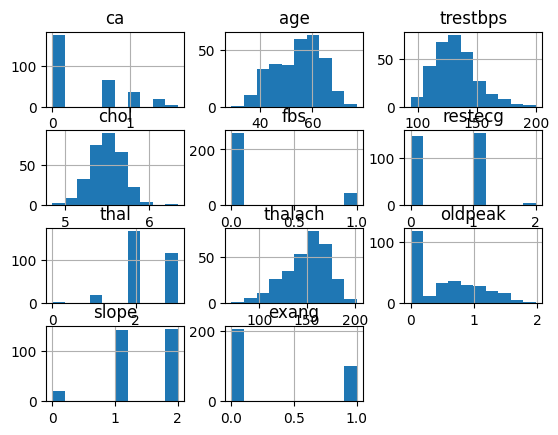

In [8]:
x.hist()

In [9]:
x=np.asanyarray(x)



جدا سازی ستون هدف

Separating the target column

In [10]:
y=file['target'].values
y=np.array(y)
y[:5]

array([1, 1, 1, 1, 1])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

print(' train set shape:',x_train.shape,y_train.shape)
print(' test set shape:',x_test.shape,y_test.shape)

 train set shape: (242, 11) (242,)
 test set shape: (61, 11) (61,)




۳۱۷ / ۵٬۰۰۰
برای اینکه الگوریتم بتونه تا ۱۰۰۰ بار تکرار بشه تا به همگرایی بهتر و نتایج دقیق‌تر دست پیدا کنه از max_iter، استفاده می‌شه. افزایش تعداد تکرارها به مدل شانس بیشتری برای بهینه‌سازی پارامترهایش می‌ده، به‌ویژه زمانی که داده‌ها پیچیده هستن یا محدودیت تکرار پیش‌فرض برای آموزش مناسب بسیار کم هست.

 is used to allow the algorithm to iterate up to 1000 times in order to achieve better convergence and more accurate results. Increasing the number of iterations gives the model more chances to optimize its parameters, especially when the data is complex or the default iteration limit is too low for proper training.

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000).fit(x_train,y_train)
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [14]:
print('y_test:',y_test)
print('y_pred:',y_pred)

y_test: [0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1
 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0]
y_pred: [0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1]


In [15]:
c=model.predict_proba(x_test)
c

array([[0.96915869, 0.03084131],
       [0.6091187 , 0.3908813 ],
       [0.74708953, 0.25291047],
       [0.07868706, 0.92131294],
       [0.69203605, 0.30796395],
       [0.26209117, 0.73790883],
       [0.25831681, 0.74168319],
       [0.25565837, 0.74434163],
       [0.06862812, 0.93137188],
       [0.83327736, 0.16672264],
       [0.02995288, 0.97004712],
       [0.96575065, 0.03424935],
       [0.34303552, 0.65696448],
       [0.60306291, 0.39693709],
       [0.86499861, 0.13500139],
       [0.6027208 , 0.3972792 ],
       [0.9380947 , 0.0619053 ],
       [0.98272538, 0.01727462],
       [0.38746019, 0.61253981],
       [0.92864978, 0.07135022],
       [0.93311682, 0.06688318],
       [0.11011633, 0.88988367],
       [0.28259921, 0.71740079],
       [0.05598539, 0.94401461],
       [0.79686136, 0.20313864],
       [0.97230873, 0.02769127],
       [0.98455477, 0.01544523],
       [0.81554201, 0.18445799],
       [0.19129641, 0.80870359],
       [0.98390109, 0.01609891],
       [0.




مدل در دقت بسیار عالی عمل کرده


در  f1score نتیجه خوبی داشته



percision  نمره خوبی کسب کرده

recall عالی هست


میزان تعادلی که بین این دو هستن هم عالیه


The model performed excellently in terms of accuracy.
It achieved a good result in F1-score.
It scored well in precision.
Recall is excellent.
The balance between the two is also great.



In [16]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

print('accuracy:',accuracy_score(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))


accuracy: 0.8032786885245902
f1 score: 0.7777777777777778
precision: 0.75
recall: 0.8076923076923077



ماتریس گیجی: ماتریس گیجی روشی برای تحلیل و ارزیابی عملکرد ماشین در طبثه بندی است.
این ماتریس به ماکمک میکنه از عملکرد طبقه بندی آگاه بشیم

Confusion Matrix: A confusion matrix is a method for analyzing and evaluating the performance of a machine in classification tasks.
This matrix helps you understand how well the classification has been performed


In [17]:
from sklearn.metrics import confusion_matrix,classification_report
import itertools

def confusion_m(cm,classes,
                     normalize=False,
                     title='Confusion matrix',
                     cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('normalized confusion matrix')
    else:
        print('no normalized confusion matrix')

        print(cm)

        plt.imshow(cm,interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt='.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('False labels')
        print(confusion_matrix(y_test,y_pred,labels=[0,1]))

no normalized confusion matrix
[[28  7]
 [ 5 21]]
[[28  7]
 [ 5 21]]


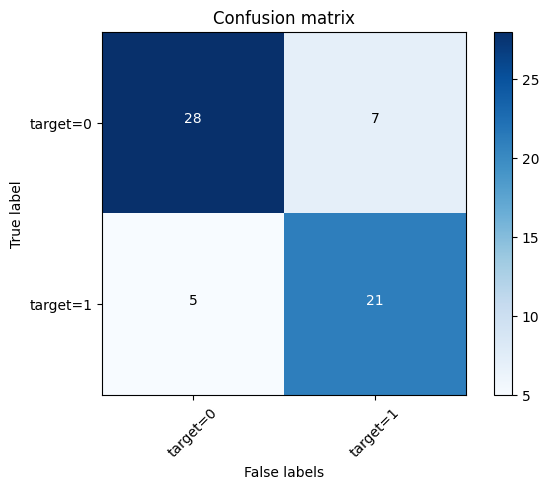

In [18]:
cm_matrix=confusion_matrix(y_test,y_pred,labels=[0,1])
np.set_printoptions(precision=2)

plt.figure()
confusion_m(cm_matrix,classes=['target=0','target=1'],normalize=False,title='Confusion matrix')